# PSI3532 - Filtragem Adaptativa e Aplicacoes
Segunda prova
----------------------------------------------------
Henrique Souza de Melo - 9347031

In [1]:
import numpy as np
from numpy import sqrt

import matplotlib.pyplot as plt
from matplotlib import rcParams

from scipy import signal

from filters import NLMS

In [2]:
def p2(sigma=sqrt(1e-3), total_time=4000, mu_0=1, epsilon=1e-3, filename='results.png'):
    s = np.random.choice([-1,1], size=total_time, p=[.5,.5])
    r = np.random.randn(total_time) * sigma
    x = signal.lfilter(b=[1], a=[1, -.95], x=s) + r
    
    nlms_filter = NLMS(M=2, mu_0=mu_0, epsilon=epsilon)
    
    for i in range(total_time):
        nlms_filter.buffer(x[i], s[i])
        
    # realizando limiarizacao em 0 para comparar resultado
    received = np.array([-1 if y_i < 0 else 1 for y_i in nlms_filter.y_])
    bit_error_rate = (received != s).sum() / len(s)
    
    # plotando resultados
    n = np.arange(len(s))
    
    rcParams.update({'font.size':15})
    fig = plt.figure(figsize=(15,10))
    fig.suptitle('Resultados para $\sigma^2={sigma_2}$'.format(
        sigma_2=round(sigma**2, 3)),
                 fontsize=18)
    
    ax1 = plt.subplot(211)
    plt.plot(n, s, n, nlms_filter.y_)
    plt.title('Comparação do sinal $s[n]$ e $\hat{y}[n]$', fontsize=16)
    plt.legend(['$s[n]$', '$\hat{y}[n]$'])
    plt.xlabel('n')
    
    plt.subplot(223)
    plt.title('Progressão do coeficiente $w_1$', fontsize=16)
    plt.plot(n, nlms_filter.W[:, 0],'r')
    plt.axhline(y=1, linestyle='--', color='.5')
    plt.xlabel('n')
    
    plt.subplot(224)
    plt.title('Progressão do coeficiente $w_2$', fontsize=16)
    plt.plot(n, nlms_filter.W[:, 1], 'g')
    plt.axhline(y=-.95, linestyle='--', color='.5')
    plt.xlabel('n')
    
    plt.text(0, 1.25,
             'BER = {}%'.format(round(bit_error_rate * 100, 2)),
             ha='center', va='center',
             transform=ax1.transAxes)
    
    plt.savefig(filename, bbox_inches='tight')
    
    # estimando MSE
    MSE = np.zeros(total_time)
    N = 500
    for i in range(N):
        nlms_filter_i = NLMS(M=2, mu_0=mu_0, epsilon=epsilon)
        for j in range(total_time):
            nlms_filter_i.buffer(x[j], s[j])
        MSE += 1 / N * np.square(nlms_filter.e)
            
    print('MSE: ', MSE[-100:].mean())

    return s, nlms_filter

## $\sigma^2=10^{-3}$

MSE:  0.008607366919765914


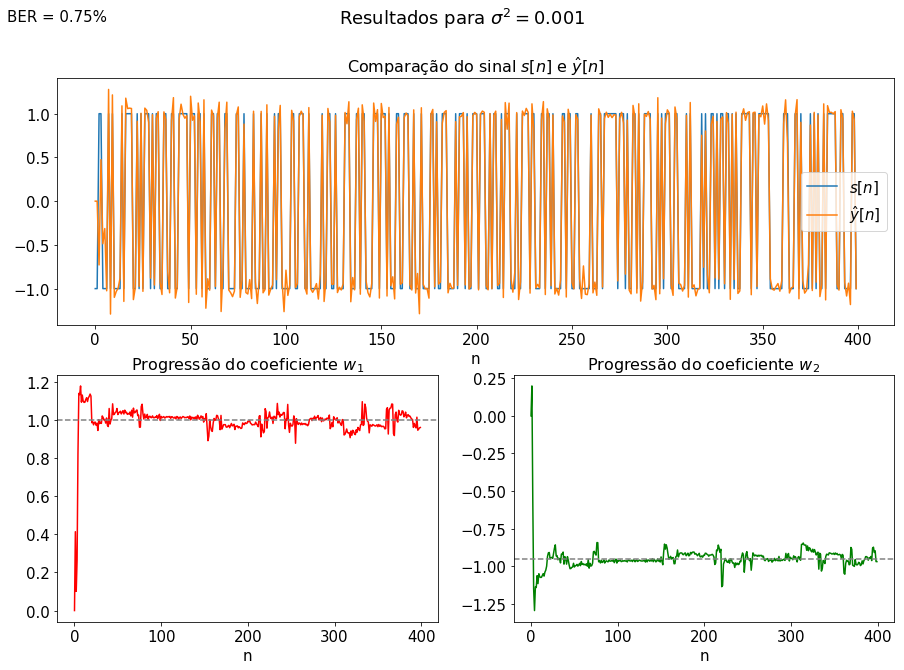

In [3]:
s, nlms_filter = p2(
    sigma=sqrt(1e-3),
    total_time=400,
    mu_0=1,
    epsilon=1e-5,
    filename='./images/results1.png'
)

## $\sigma^2=10^{-1}$

MSE:  0.2042201473426684


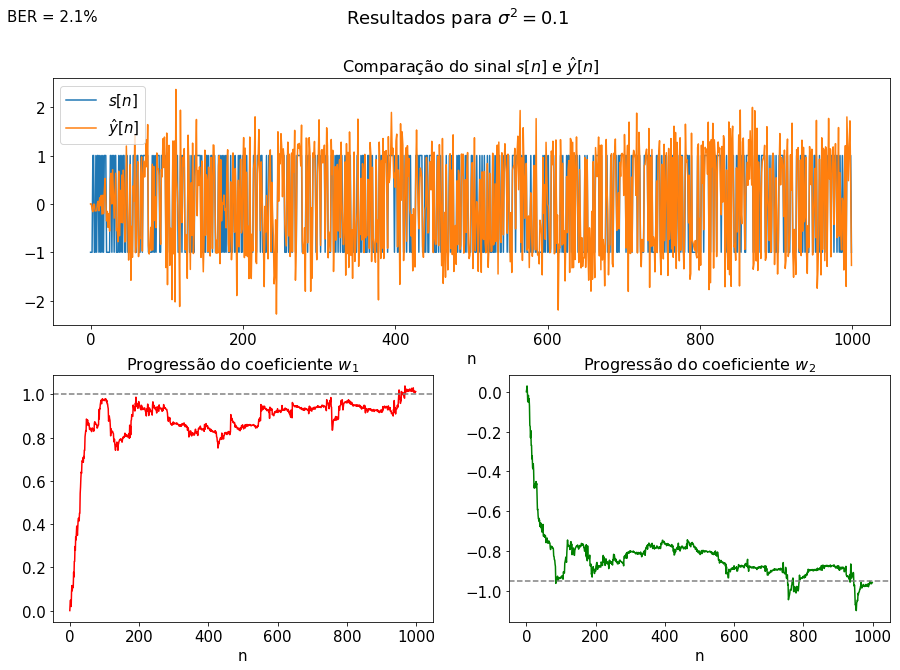

In [4]:
s, nlms_filter = p2(
    sigma=sqrt(1e-1),
    total_time=1000,
    mu_0=.1,
    epsilon=.2,
    filename='./images/results2.png'
)